# Chapter 9 - The SARIMAX Model

## Listing 9-1. Preparing the data and making a plot

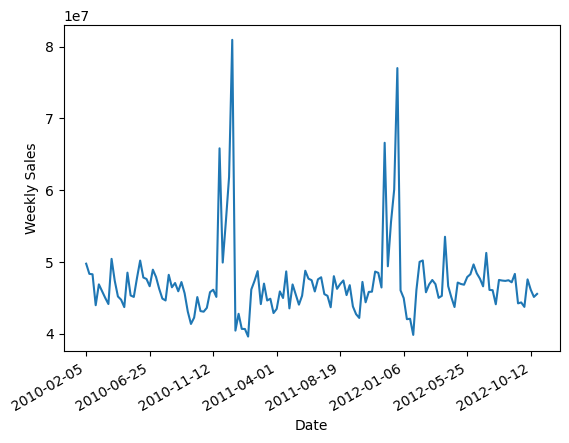

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
data = data.groupby('Date').sum()
data['IsHoliday'] = data['IsHoliday'] > 0
data['IsHoliday'] = data['IsHoliday'].apply(
    lambda x: float(x)
)

ax = data['Weekly_Sales'].plot()
ax.set_ylabel('Weekly Sales')
plt.gcf().autofmt_xdate()
plt.show()


## Listing 9-2 Is there a correlation between sales and holidays?

In [2]:
data[['Weekly_Sales', 'IsHoliday']].corr()

,Weekly_Sales,IsHoliday
Weekly_Sales,1.000000,0.172683
IsHoliday,0.172683,1.000000


## Listing 9-3 Fitting a SARIMAX model 

2025/05/26 09:13:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/26 09:13:17 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
2025/05/26 09:13:18 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '09e5efbdec6e4d88b2096fb73c936a4b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
/opt/anaconda3/envs/chapter7/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:

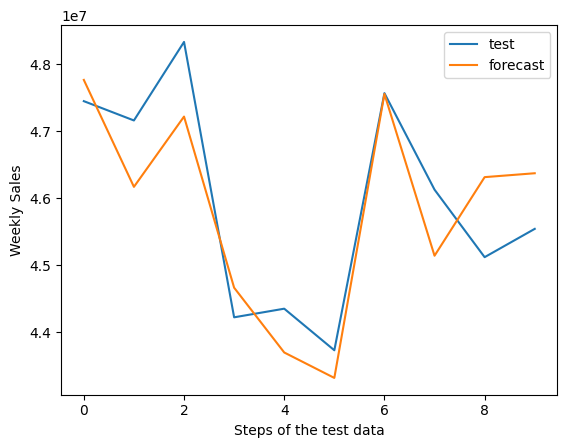

0.7343408614772756


In [3]:
import random
random.seed(12345)
import statsmodels.api as sm
from sklearn.metrics import r2_score
import mlflow

mlflow.autolog()

train = data['Weekly_Sales'][:-10]
test = data['Weekly_Sales'][-10:]

mod = sm.tsa.statespace.SARIMAX(
    endog=data['Weekly_Sales'][:-10],
    exog=data['IsHoliday'][:-10],
    order=(0,1,1),
    seasonal_order=(1,1,1,52),
)
res = mod.fit(disp=False)
fcst = res.forecast(steps=10, exog = data['IsHoliday'][-10:])

plt.plot(list(test))
plt.plot(list(fcst))
plt.xlabel('Steps of the test data')
plt.ylabel('Weekly Sales')
plt.legend(['test', 'forecast'])
plt.show()

print(r2_score(test, fcst))
